# **Regression Trees - rice_ml**
This notebook demonstrates how to use the DecisionTreeRegressor class within the rice_ml package. It demonstrates it in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note that when using this in robust model selection, k-fold cross-validation and deeper hyperparameter tuning is recommended. In this example, since it's main goal is demonstrating the classes, we will not do as deep of hyperparameter tuning, and will compare every test using the same random state (42).

This notebook shows how to:
- Use 'DecisionTreeRegressor' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate decision trees on a regression task

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Decision Tree Regression](#decision-tree-regression)
  - [Model Training](#model-training)
  - [Results](#results)

## Algorithm
A random forest uses ...


describe decision trees:
A regression tree is a supervised learning algorithm that models a continuous value by recursively dividing the feature space into regions and fitting a constant prediction within each region. Unlike classification trees, which predict labels, regression trees predict numeric values.

The algorithm repeatedly selects a feature and a value to split it at that separates the data the best. It uses mean squared error (MSE) to decide which split is best. At each node in the tree, it chooses the split that results in the lowest MSE, continuing down the tree until a leaf node is reached. Each node represents a decision rule, and every leaf represents a prediction value.

To make a prediction, a data point is passed through the tree, moving down towards as leaf as dicated by the decision rules it reaches. Once it reaches a leaf, that predicted value is returned as the data point's prediction.


![Decision Tree Example](../images/regressor_tree.png)
Source: [Medium](https://medium.com/@sametgirgin/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16)


### Pros vs Cons
#### Pros
- Strong performance even before hyperparemeter tuning
- Reduces overfitting compared to a single decision tree
- Handles non-linear decision boundaries well
- Robust to noise
- Handles high-dimensional data well
#### Cons
- Less interpretable than a single decision tree
- Expensive computational cost
- Model size can take up a lot of memory
- Slower predictions than a single decision tree

## Data Preparation
For classification, we will be using the MNIST digits dataset. It is a widely used benchmark for image classification. It contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels.
For sake of runtime, we will be using a random 10,000 data point sample from the dataset.

For regression, we will be using the California Housing data from 'sklearn'. It contains census information about median housing prices in California districts. Given demographic and geographic features, we can use it to predict the median house value for a district.

X shape: (10000, 784)
y shape: (10000,)
X Overall Summary:
Min: 0.000
Max: 1.000
Mean: 0.132
Std: 0.309
Before normalization:
Mean (first 5 features): [0. 0. 0. 0. 0.]
Std  (first 5 features): [0. 0. 0. 0. 0.]
Min  (first 5 features): [0. 0. 0. 0. 0.]
Max  (first 5 features): [0. 0. 0. 0. 0.]


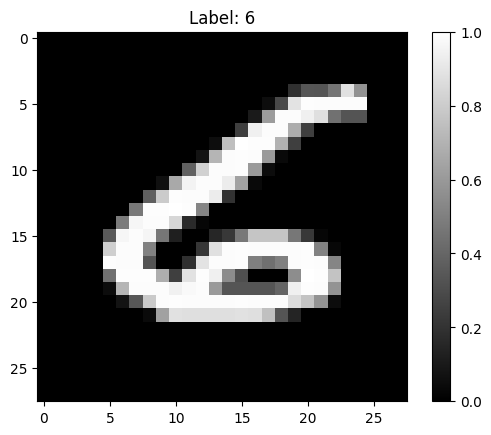

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from rice_ml.utilities import train_test_split, confusion_matrix, plot_confusion_matrix

np.random.seed(42)

X_raw, y_raw = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False,
)

rng = np.random.default_rng(42)
idxs = np.arange(len(X_raw))
rng.shuffle(idxs)
idxs = idxs[:10000]
X_raw = X_raw[idxs]
y_raw = y_raw[idxs]

X_clf = np.asarray(X_raw) / 255.0
y_clf = np.asarray(y_raw).astype(int)


X = np.asarray(X_raw)
y = np.asarray(y_raw)

# Scaling
X = X / 255.0
y = y.astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("X Overall Summary:")
print(f"Min: {X.min():.3f}")
print(f"Max: {X.max():.3f}")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

print("Before normalization:")
print("Mean (first 5 features):", np.round(X.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X.std(axis=0)[:5], 2))
print("Min  (first 5 features):", X.min(axis=0)[:5])
print("Max  (first 5 features):", X.max(axis=0)[:5])

image = X[0].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {y[0]}")
plt.colorbar()
plt.show()

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = data.data
y = data.target
feature_names = data.feature_names

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Features:", feature_names)

X shape: (20640, 8)
y shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Random Forest Classification
Above we can see some useful information for the dataset, plus a visualization of the first image in the data. We will now run the random forest classifier on it.

RandomForest Classification Accuracy: 0.887


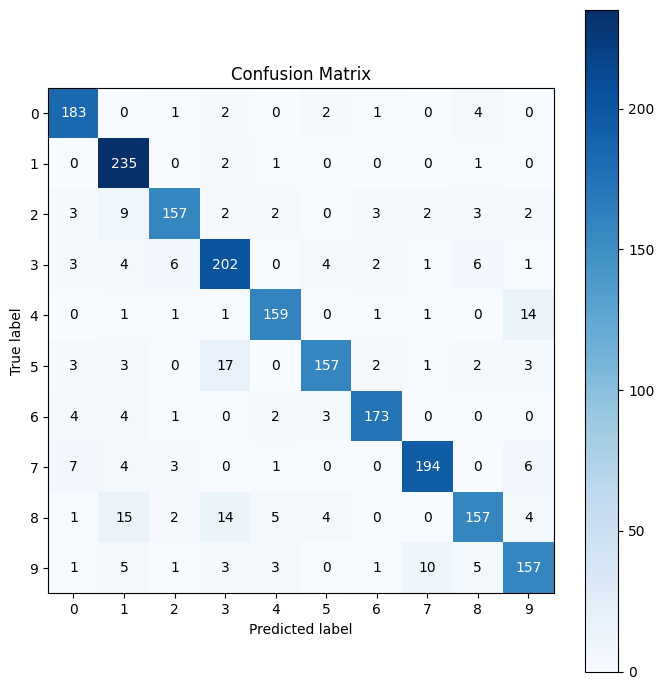

In [3]:
from rice_ml.supervised_learning.ensemble_methods import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_clf,
    y_clf,
    test_size=0.2,
    random_state=42,
)

clf = RandomForestClassifier(n_estimators=30, max_depth=8, random_state=42, max_features="sqrt", min_samples_leaf=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f"RandomForest Classification Accuracy: {accuracy:.3f}")
cm = confusion_matrix(y_test, y_pred, num_classes=10)
plot_confusion_matrix(cm, class_labels=list(range(10)))

### Results

Analysis

We can see that the model performs fairly well, but does struggle with some different predictions. The model could greatly benefit from hyperparemeter tuning, as n_estimators could be increased and the leaf and split minimums could change along with the max depth. This is a valuable thing to do normally, but a downside to things like random forests is that it takes a very long time for each run, so optimizing parameters takes quite a long time. For the sake of this notebook being understandable and useable, we will not implement optimization.

If you want to test out some optimization, some things to test out are:
- greater n_estimators
- greater leaf and split minimums
- different max depths
Ensure you use cross validation and then compare whatever resulting metric you care most about. In this package score returns standard accuracy, but there are many other metrics that can be used, such as precision, recall, and f1. They each have their own tradeoffs, so choosing what to focus on can be very beneficial.

With some models, we would now apply normalization to see if we can get any improvements in performance.
When it comes to tree-based models, normalization does not affect the results. You can see an example of this in the Regression_Trees notebook.


#### Error Analaysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

model = RandomForestClassifier(n_estimators=30, max_depth=5, min_samples_leaf=3)

model.fit(X_train, y_train)

results = model.predict(X_test)
accuracy = model.score(X_test, y_test)


errors = (results != y_test)
X_err = X_test[errors]
y_err = y_test[errors]
y_pred_err = results[errors]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    y_err_val = 4
    if y_err[i] == 1:
        y_err_val = 9

    y_pred_err_val = 4
    if y_pred_err[i] == 1:
        y_pred_err_val = 9
    ax.imshow(X_err[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_err_val}  Pred: {y_pred_err_val}")
    ax.axis("off")


## Random Forest Regression

### Model Training

In [6]:
from rice_ml.supervised_learning.ensemble_methods import RandomForestRegressor
from rice_ml.utilities.preprocess import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

model = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42, max_features="sqrt", min_samples_leaf=3)

model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f"R2 score: {r2:.3f}")

y_pred = model.predict(X_test)

mse = ((y_test - y_pred) ** 2).mean()
print(f"RMSE: {np.sqrt(mse):.3f}")

R2 score: 0.001
RMSE: 3.162


### Results
The model does very poorly, effectively just predicting at random. This data is clearly better suited for non-tree based models. Improvement could definitely be made with parameter tuning, although that score is very poor and is going to be hard to improve enough. Using an algorithm like k-nearest neighbors would work much better for this model, and it makes intuitive sense to use something like that instead.